In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
#reaching counties area data and forming the dataframe
path_area = "C:/Users/Mehmet/Desktop/data/us_rental_data/counties_area.csv"
df = pd.read_csv(path_area).dropna().reset_index()
df.drop('index',axis=1,inplace=True)
df.columns= ['County','State','Land Area(sq mi,2011)']

In [3]:
#reaching counties population data and forming the dataframe
path_popul = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_residential_population.csv"
population = pd.read_csv(path_popul).dropna().reset_index()
population.drop('index',axis=1,inplace=True)

In [4]:
# Concating the population data to main data frame
df['Resident Population(2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==population.iloc[i,0]:
        df.iloc[i,-1] =population.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [5]:
# Generating density column
df['Density(sq mi / People )']=round(df['Resident Population(2010)']/df['Land Area(sq mi,2011)'],2)

In [6]:
# Concating the population change data to main data frame
df['Population Change(%,2000-2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==population.iloc[i,0]:
        df.iloc[i,-1] =population.iloc[i,3]
    else:
        df.iloc[i,-1] = np.nan

In [7]:
#reaching counties crime data and forming the dataframe
path_crime = "C:/Users/Mehmet/Desktop/data/us_rental_data/counties_crime_reported_police.csv"
crime = pd.read_csv(path_crime).dropna().reset_index()
crime.drop('index',axis=1,inplace=True)

In [8]:
# Concating the crime data to main data frame
df['Crime Report to Police(2008)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==crime.iloc[i,0]:
        df.iloc[i,-1] =crime.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [9]:
# Generating per capita crime report column
df['Per Capita Crime Report'] = round(df['Crime Report to Police(2008)']/df['Resident Population(2010)'],4)

In [10]:
#reaching counties university student enrollment data and forming the dataframe
path_university_enrollment = "C:/Users/Mehmet/Desktop/data/us_rental_data/counties_undergraduate_graduate_enrollment.csv"
university_enrollment = pd.read_csv(path_university_enrollment).dropna().reset_index()
university_enrollment.drop('index',inplace=True,axis=1)

In [11]:
# striping space on the data
university_enrollment.iloc[:,2] = university_enrollment.iloc[:,2].apply(lambda x: int(x.strip().replace(',','').replace('-','0')) )
university_enrollment.iloc[:,3] = university_enrollment.iloc[:,3].apply(lambda x: int(x.strip().replace(',','').replace('-','0')) )

In [12]:
# Concating the university student enrolment data to main data frame
df['University Student Enrollment'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==university_enrollment.iloc[i,0]:
        df.iloc[i,-1] =int(university_enrollment.iloc[i,2])+int(university_enrollment.iloc[i,3])
    else:
        df.iloc[i,-1] = np.nan

In [13]:
#generating per capita university student enrollment
df['University Student Concentration(%)'] = round(df['University Student Enrollment']/df['Resident Population(2010)']*100,2)

In [14]:
# reaching the building permit data
path_building_permit = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_building_permit.csv"
building_permit = pd.read_csv(path_building_permit).reset_index()
building_permit.drop(['index','Unnamed: 2'],axis=1,inplace=True)
building_permit.dropna(inplace=True)

In [15]:
# Concating the building permit data to main data frame
df['Building Permit(2010)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==building_permit.iloc[i,0]:
        df.iloc[i,-1] =building_permit.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [16]:
# generating per capita building permit data
df['Per Capita Building Permit(2010)'] = round(df['Building Permit(2010)']/df['Resident Population(2010)'],4)

In [17]:
# reaching the median age data 
path_median_age = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_median_age.csv"
median_age = pd.read_csv(path_median_age).dropna().reset_index()
median_age.drop('index',axis=1,inplace=True)

In [18]:
# Concating the median age data to main data frame
df['Median Age(2010)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==median_age.iloc[i,0]:
        df.iloc[i,-1] =median_age.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [19]:
# reaching the per capita income data data 
path_per_capita_income = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_per_capita_income.csv"
per_capita_income = pd.read_csv(path_per_capita_income).dropna().reset_index()
per_capita_income.drop('index',axis=1,inplace=True)

In [20]:
#concating the per capita income data to main data frame
df['Per Capita Income(2009)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==per_capita_income.iloc[i,0]:
        df.iloc[i,-1] = per_capita_income.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [21]:
# reaching the race data
path_race = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_race.csv"
race = pd.read_csv(path_race).dropna().reset_index()
race.drop('index',axis=1,inplace=True)

In [22]:
# concating the race data to main data frame
df['White Population Consentration(2009,(%))'] = 0
df['Black Population Consentration(2009,(%))'] = 0
df['Asian Population Consentration(2009,(%))'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-3] = race.iloc[i,2]
    else:
        df.iloc[i,-3] = np.nan

for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-2] = race.iloc[i,3]
    else:
        df.iloc[i,-2] = np.nan
        
        
for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-1] = race.iloc[i,4]
    else:
        df.iloc[i,-1] = np.nan

In [23]:
# generating other race data column
df['Other Race Population Consentration(2009,(%))'] = round(100-(df.iloc[:,-1]+df.iloc[:,-2]+df.iloc[:,-3]),2)
df['Non_White Population Consentration(2009,(%))'] = 100 - df['White Population Consentration(2009,(%))']

In [24]:
#reaching vacant occupied data
path_vacant_occupied_home= "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_vacant_occupied_medianroom.csv"
vacant_occupied_home = pd.read_csv(path_vacant_occupied_home).reset_index()
vacant_occupied_home.drop(['index','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)
vacant_occupied_home.dropna(inplace=True)

In [25]:
# concating occopied and vacant house data to main data frame
df['Median Room Number of the Houses(2009)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,3]
    else:
        df.iloc[i,-1] = np.nan
        
df['Vacant Housing Units(2010)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan
        
df['Occupied Housing Units(2010)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,4]
    else:
        df.iloc[i,-1] = np.nan

In [26]:
# stripping the spaces on the data
df['Vacant Housing Units(2010)']=df['Vacant Housing Units(2010)'].apply(lambda x: int(x))
df['Occupied Housing Units(2010)'] = df['Occupied Housing Units(2010)'].apply(lambda x: int(x))

In [27]:
# generating per capita vacant and occupied housing data
df['Vacant Housing Rate(%,2010)'] = round(df['Vacant Housing Units(2010)']/(df['Vacant Housing Units(2010)']+df['Occupied Housing Units(2010)'] )*100,2)
df['Per Capita Vacant Housing(2010)'] = round(df['Vacant Housing Units(2010)']/df['Resident Population(2010)'],4)

In [28]:
# reaching unemployment data
path_unemployment = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_unemployment.csv"
unemployment = pd.read_csv(path_unemployment).dropna().reset_index()
unemployment.drop('index',axis=1,inplace=True)

In [29]:
# concating unemployment data to the main data frame
df['Unemployment Rate(2010,(%))'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==unemployment.iloc[i,0]:
        df.iloc[i,-1] = unemployment.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [30]:
#reaching average house hold data
path_average_household_size ="C:/Users/Mehmet/Desktop/data/us_rental_data/average_household_size.csv"
average_household_size = pd.read_csv(path_average_household_size).dropna().reset_index()
average_household_size.drop('index',axis=1,inplace=True)

In [31]:
# concating average house hold data to main data frame
df['Average Household Size']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==average_household_size.iloc[i,0]:
        df.iloc[i,-1] =average_household_size.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [32]:
# reaching renter_occupied_data
path_renter_occupied_housing_units = "C:/Users/Mehmet/Desktop/data/us_rental_data/renter_occupied_housing_units.csv"
renter_occupied_housing_units = pd.read_csv(path_renter_occupied_housing_units).dropna().reset_index()
renter_occupied_housing_units.drop('index',axis=1,inplace=True)

In [33]:
# concating renter occpied data to the main data frame
df['Renter Occupied Housing Units(2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==renter_occupied_housing_units.iloc[i,0]:
        df.iloc[i,-1] =renter_occupied_housing_units.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [34]:
#generating renter occupied housing data
df['Renter Occpied Housing Rate(2010)'] = round(df['Renter Occupied Housing Units(2010)']/df['Occupied Housing Units(2010)']*100,2)

In [35]:
#reaching median gross cash paying rent
path_median_rent = "C:/Users/Mehmet/Desktop/data/us_rental_data/median_gross_paying_cash_rent.csv"
median_rent = pd.read_csv(path_median_rent).dropna().reset_index()
median_rent.drop('index',axis=1,inplace=True)

In [36]:
#concating median gross paying data to the main data frame
df['Median Cash Paid Rent(2005-2009)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==median_rent.iloc[i,0]:
        df.iloc[i,-1] =median_rent.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [37]:
# Checking total data (some data have 3 missing observations)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   County                                         3145 non-null   object 
 1   State                                          3145 non-null   object 
 2   Land Area(sq mi,2011)                          3145 non-null   float64
 3   Resident Population(2010)                      3145 non-null   int64  
 4   Density(sq mi / People )                       3142 non-null   float64
 5   Population Change(%,2000-2010)                 3145 non-null   float64
 6   Crime Report to Police(2008)                   3145 non-null   int64  
 7   Per Capita Crime Report                        3142 non-null   float64
 8   University Student Enrollment                  3145 non-null   int64  
 9   University Student Concentration(%)            3142 

In [38]:
# Checking nan values
df.isna().any()
# the columns that have missing values
df.columns[df.isna().any()]

Index(['Density(sq mi / People )', 'Per Capita Crime Report',
       'University Student Concentration(%)',
       'Per Capita Building Permit(2010)', 'Vacant Housing Rate(%,2010)',
       'Per Capita Vacant Housing(2010)', 'Renter Occpied Housing Rate(2010)'],
      dtype='object')

In [39]:
# Total misisng values on the data
df.dropna(inplace=True)
df.isna().sum()

County                                           0
State                                            0
Land Area(sq mi,2011)                            0
Resident Population(2010)                        0
Density(sq mi / People )                         0
Population Change(%,2000-2010)                   0
Crime Report to Police(2008)                     0
Per Capita Crime Report                          0
University Student Enrollment                    0
University Student Concentration(%)              0
Building Permit(2010)                            0
Per Capita Building Permit(2010)                 0
Median Age(2010)                                 0
Per Capita Income(2009)                          0
White Population Consentration(2009,(%))         0
Black Population Consentration(2009,(%))         0
Asian Population Consentration(2009,(%))         0
Other Race Population Consentration(2009,(%))    0
Non_White Population Consentration(2009,(%))     0
Median Room Number of the House

In [40]:
# descriptive statistic of the data
for i in df.columns:
    print(df[i].describe())

count           3142
unique          1833
top       Washington
freq              31
Name: County, dtype: object
count     3142
unique      50
top         TX
freq       254
Name: State, dtype: object
count      3142.000000
mean       1124.075735
std        3611.943252
min           2.000000
25%         430.832500
50%         616.005000
75%         923.992500
max      145504.790000
Name: Land Area(sq mi,2011), dtype: float64
count    3.142000e+03
mean     9.807251e+04
std      3.128220e+05
min      8.200000e+01
25%      1.110025e+04
50%      2.584900e+04
75%      6.652800e+04
max      9.818605e+06
Name: Resident Population(2010), dtype: float64
count     3142.000000
mean       256.266862
std       1715.846631
min          0.040000
25%         16.900000
50%         45.170000
75%        113.527500
max      69464.430000
Name: Density(sq mi / People ), dtype: float64
count    3142.000000
mean        4.398472
std        16.922115
min       -32.000000
25%        -5.900000
50%         1.400000


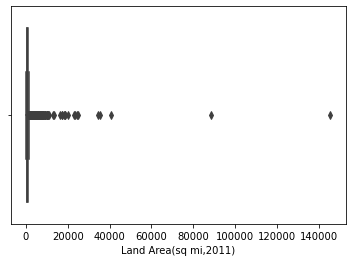

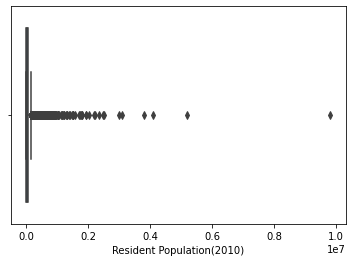

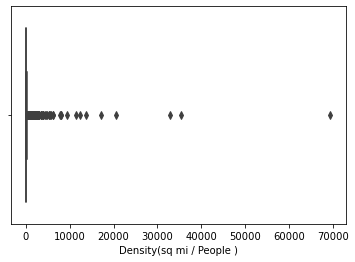

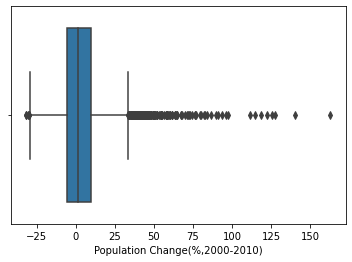

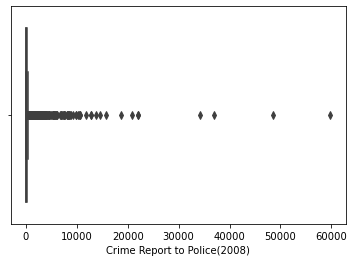

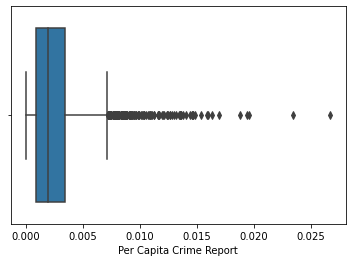

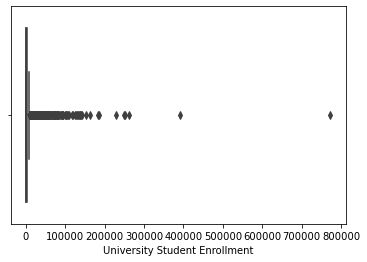

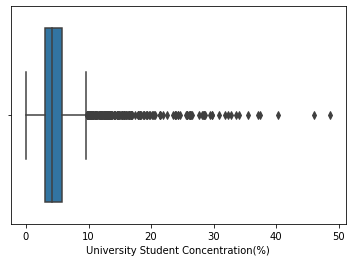

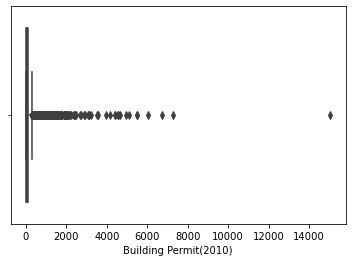

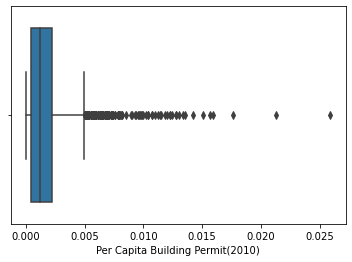

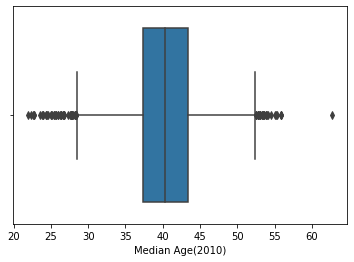

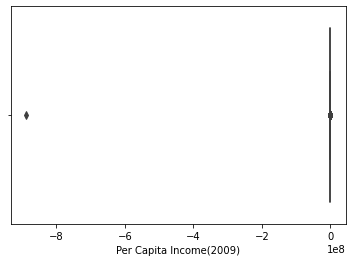

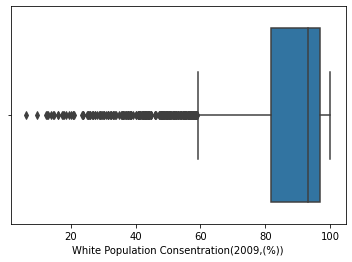

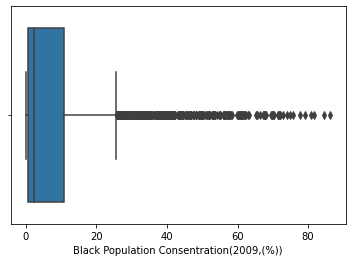

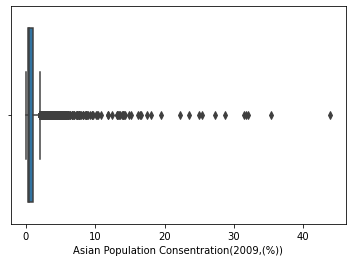

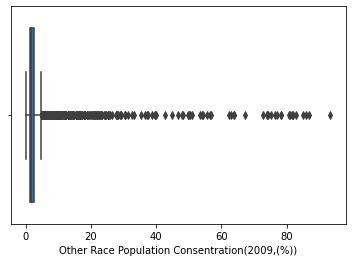

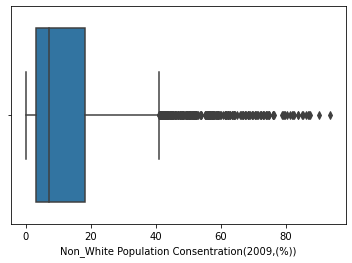

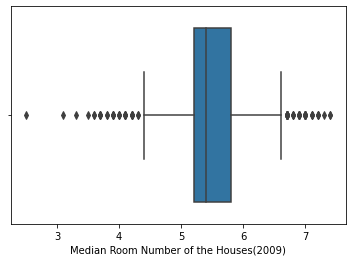

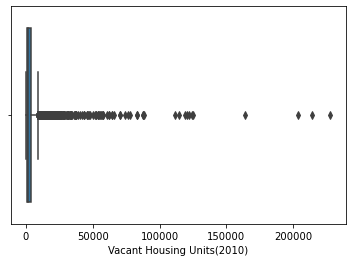

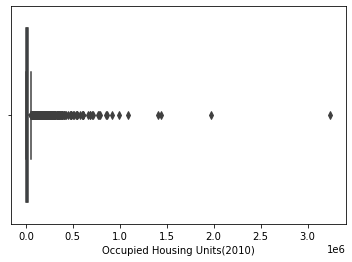

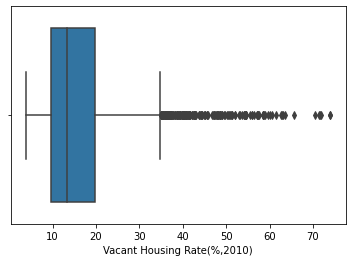

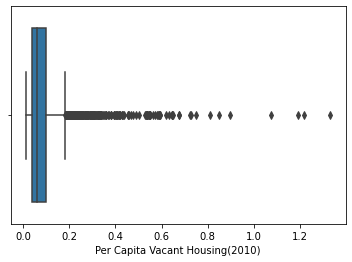

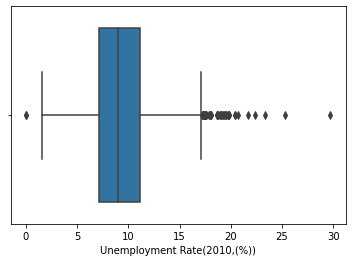

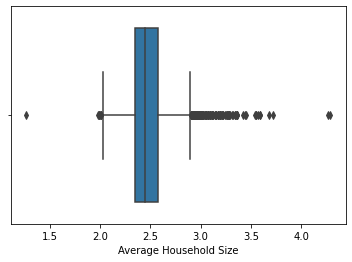

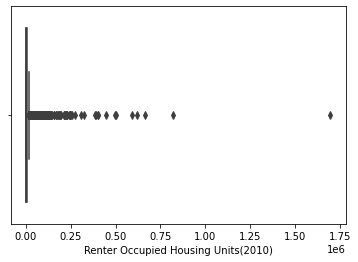

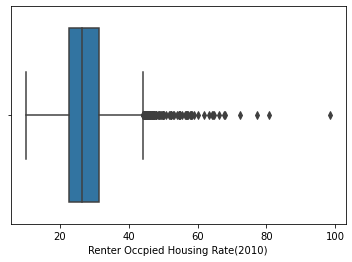

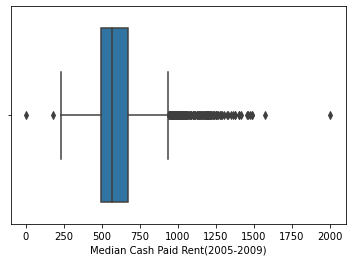

In [41]:
# visualizing descriptive data
for i in df.describe().columns:
    sns.boxplot(x=df[i])
    plt.show()

In [42]:
#removing ot;liers on the some data
df['z_score']=stats.zscore(df['Resident Population(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>3].count()))
df = df.loc[df['z_score'].abs()<=3]
df.drop('z_score',inplace=True,axis=1)  

df['z_score']=stats.zscore(df['Density(sq mi / People )'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>3].count()))
df = df.loc[df['z_score'].abs()<=3]
df.drop('z_score',inplace=True,axis=1)



df['z_score']=stats.zscore(df['Median Age(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>4].count()))
df = df.loc[df['z_score'].abs()<=4]
df.drop('z_score',inplace=True,axis=1)

df['z_score']=stats.zscore(df['Median Room Number of the Houses(2009)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>4].count()))
df = df.loc[df['z_score'].abs()<=4]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Unemployment Rate(2010,(%))'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>4].count()))
df = df.loc[df['z_score'].abs()<=4]
df.drop('z_score',inplace=True,axis=1)



df['z_score']=stats.zscore(df['Average Household Size'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Renter Occpied Housing Rate(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Median Cash Paid Rent(2005-2009)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Per Capita Vacant Housing(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>6].count()))
df = df.loc[df['z_score'].abs()<=6]
df.drop('z_score',inplace=True,axis=1)

df['z_score']=stats.zscore(df['Per Capita Income(2009)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)

The number of outlier is 37.
The number of outlier is 38.
The number of outlier is 1.
The number of outlier is 12.
The number of outlier is 4.
The number of outlier is 7.
The number of outlier is 3.
The number of outlier is 4.
The number of outlier is 11.
The number of outlier is 1.


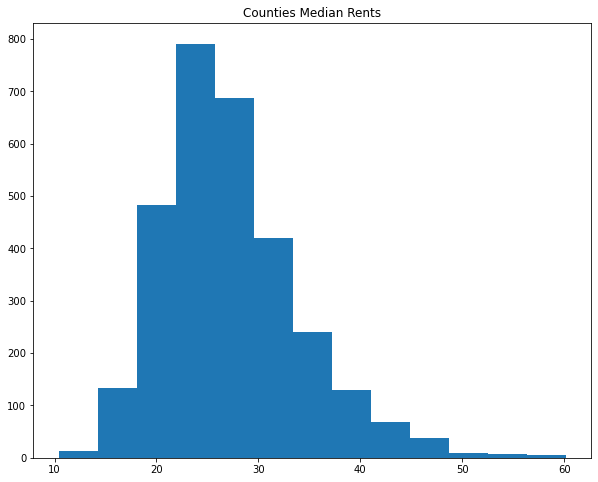

In [43]:
bins = int(round(1 + (3.322*np.log10(len(df)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df.iloc[:,27].values,bins=bins)
plt.xlabel = 'Median Rents'
plt.ylabel = 'Frequency'
plt.title('Counties Median Rents')
plt.show()

In [44]:
# data columns and index values
for i in enumerate(df.columns):
    print(i)    

(0, 'County')
(1, 'State')
(2, 'Land Area(sq mi,2011)')
(3, 'Resident Population(2010)')
(4, 'Density(sq mi / People )')
(5, 'Population Change(%,2000-2010)')
(6, 'Crime Report to Police(2008)')
(7, 'Per Capita Crime Report')
(8, 'University Student Enrollment')
(9, 'University Student Concentration(%)')
(10, 'Building Permit(2010)')
(11, 'Per Capita Building Permit(2010)')
(12, 'Median Age(2010)')
(13, 'Per Capita Income(2009)')
(14, 'White Population Consentration(2009,(%))')
(15, 'Black Population Consentration(2009,(%))')
(16, 'Asian Population Consentration(2009,(%))')
(17, 'Other Race Population Consentration(2009,(%))')
(18, 'Non_White Population Consentration(2009,(%))')
(19, 'Median Room Number of the Houses(2009)')
(20, 'Vacant Housing Units(2010)')
(21, 'Occupied Housing Units(2010)')
(22, 'Vacant Housing Rate(%,2010)')
(23, 'Per Capita Vacant Housing(2010)')
(24, 'Unemployment Rate(2010,(%))')
(25, 'Average Household Size')
(26, 'Renter Occupied Housing Units(2010)')
(27, '

In [45]:
#Feature and target
y = df.iloc[:,28]
X = df.iloc[:,[4,5,7,9,11,12,13,14,15,16,17,18,19,22,23,24,25,27]]

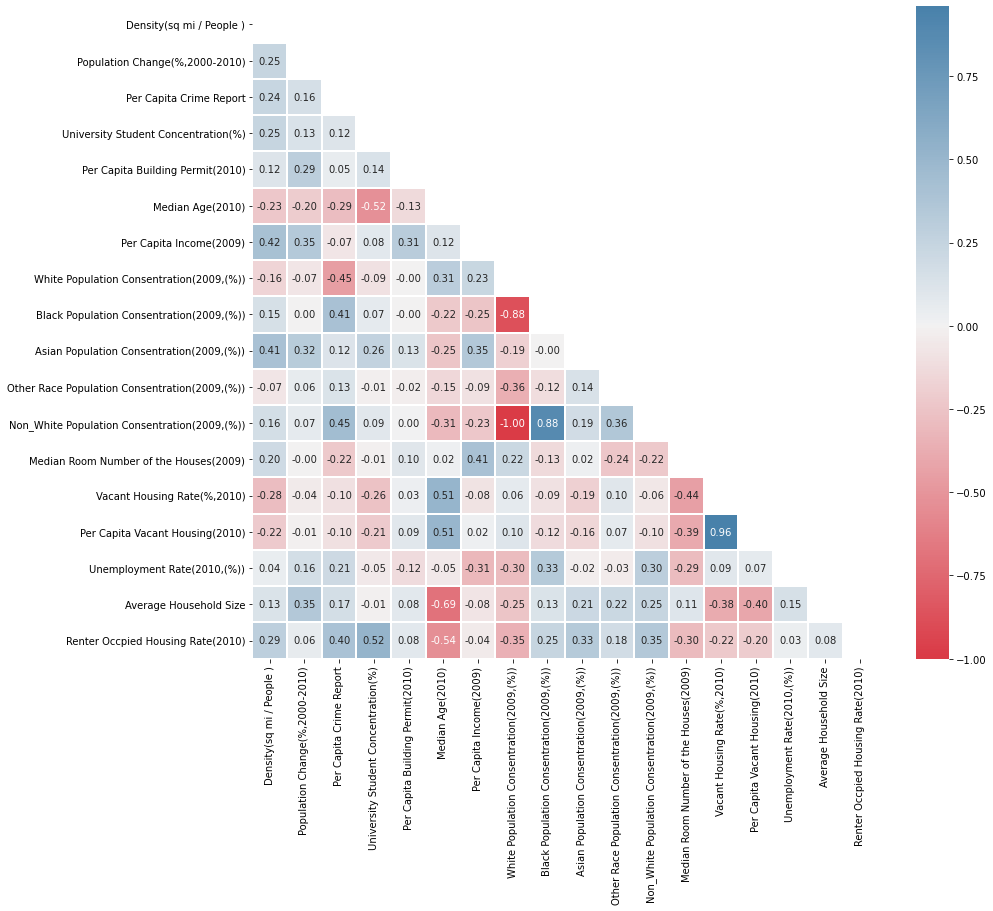

In [46]:
# Correlation Matrix and visualazing it on heat map
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
figure = plt.figure(figsize=(14,12))
sns.heatmap(X.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [48]:
seed=42
#Instantiate a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=seed)

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=seed)


In [52]:
# Fitting
rf_random.fit(X_train,y_train)
ref_random_best_param = rf_random.best_params_
print('Random Forest Best Parameters:\n',ref_random_best_param)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   7.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600,

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=  12.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  11.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  12.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True, total=  12.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1200, m

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 22.6min finished


Random Forest Best Parameters:
 {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [53]:
rf = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5,min_samples_leaf= 1, max_features= 'auto', max_depth= 50, bootstrap=False)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, min_samples_split=5,
                      n_estimators=1000)

In [76]:
# Prediction
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
# Train data evaulatuin 
print("\n")
print("Train Data Mean absolute error (MAE):      %f" % mean_absolute_error(y_train,y_pred_train))
print("Train Data Mean squared error (MSE):       %f" % mean_squared_error(y_train,y_pred_train))
print("Train Data Root mean squared error (RMSE): %f" % np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Train Data R square (R^2):                 %f" % r2_score(y_train,y_pred_train))



Train Data Mean absolute error (MAE):      11.591345
Train Data Mean squared error (MSE):       437.021743
Train Data Root mean squared error (RMSE): 20.905065
Train Data R square (R^2):                 0.981833


In [57]:
# Test data evaulatuin 
print("\n")
print("Test Data Mean absolute error (MAE):      %f" % mean_absolute_error(y_test,y_pred_test))
print("Test Data Mean squared error (MSE):       %f" % mean_squared_error(y_test,y_pred_test))
print("Test Data Root mean squared error (RMSE): %f" % np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Test Data R square (R^2):                 %f" % r2_score(y_test,y_pred_test))



Test Data Mean absolute error (MAE):      73.427098
Test Data Mean squared error (MSE):       10759.264456
Test Data Root mean squared error (RMSE): 103.726874
Test Data R square (R^2):                 0.583092


In [60]:
X_train

,Density(sq mi / People ),"Population Change(%,2000-2010)",Per Capita Crime Report,University Student Concentration(%),Per Capita Building Permit(2010),Median Age(2010),Per Capita Income(2009),"White Population Consentration(2009,(%))","Black Population Consentration(2009,(%))","Asian Population Consentration(2009,(%))","Other Race Population Consentration(2009,(%))","Non_White Population Consentration(2009,(%))",Median Room Number of the Houses(2009),"Vacant Housing Rate(%,2010)",Per Capita Vacant Housing(2010),"Unemployment Rate(2010,(%))",Average Household Size,Renter Occpied Housing Rate(2010)
1005,35.37,-3.3,0.0001,3.51,0.0003,41.6,18380,95.6,3.0,0.1,1.3,4.4,5.1,26.37,0.1397,11.3,2.52,20.71
885,18.99,-11.9,0.0000,3.78,0.0005,43.8,27600,98.4,0.4,0.2,1.0,1.6,6.1,10.60,0.0495,6.9,2.37,20.21
1419,47.16,9.0,0.0008,2.72,0.0001,36.4,18505,89.1,9.8,0.2,0.9,10.9,5.5,14.45,0.0597,10.1,2.76,17.70
2481,121.51,1.2,0.0064,3.10,0.0000,41.6,19419,93.4,4.3,0.8,1.5,6.6,5.3,10.61,0.0474,12.4,2.46,27.03
2172,56.26,7.9,0.0016,5.84,0.0003,37.2,23348,82.8,10.9,0.5,5.8,17.2,5.6,11.08,0.0455,6.4,2.60,21.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,6.18,-11.2,0.0006,2.16,0.0009,49.2,24022,99.0,0.2,0.1,0.7,1.0,5.5,36.04,0.2501,3.2,2.22,21.53
1139,824.57,9.8,0.0077,7.54,0.0031,33.2,26675,71.9,25.4,1.3,1.4,28.1,5.2,7.08,0.0299,5.7,2.49,34.99
1174,38.75,6.0,0.0033,4.13,0.0024,41.9,19179,50.0,49.2,0.2,0.6,50.0,5.3,22.09,0.0721,8.3,2.60,25.89
1348,4.29,-7.2,0.0012,2.70,0.0011,46.4,25192,95.0,0.6,0.2,4.2,5.0,5.2,25.65,0.1522,8.8,2.23,22.52


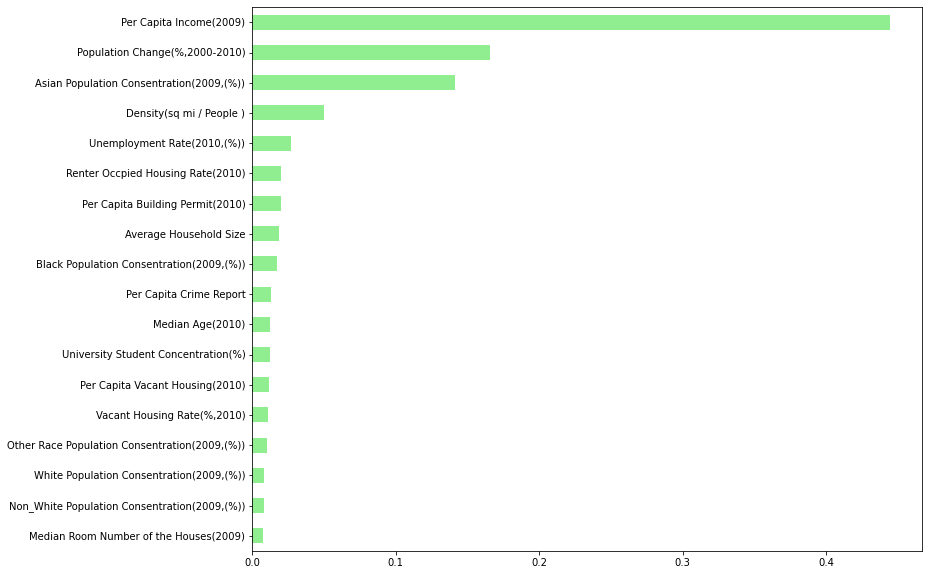

In [62]:
# Importance of features
importance_rf  = pd.Series(rf.feature_importances_,index=X_train.columns)
fig = plt.figure(figsize=(12,10))
sorted_importance_rf = importance_rf.sort_values()
sorted_importance_rf.plot(kind='barh',color='lightgreen')
plt.show()

In [88]:
train_pred =pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_train}).round()

In [93]:
test_pred =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test}).round()

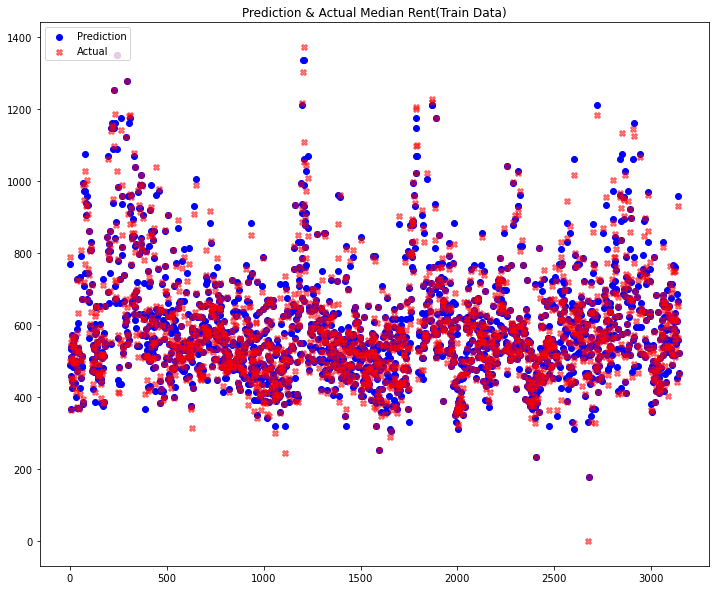

In [92]:
fig = plt.figure(figsize=(12,10))
plt.scatter(y=train_pred['Predicted'] , x=train_pred.index,color='blue',marker='o',label='Prediction')
plt.scatter(y=y_train,x=y_train.index, color='red', alpha=0.5,marker='X',label='Actual')
plt.title('Prediction & Actual Median Rent(Train Data)')
plt.legend(loc=2)
plt.show()

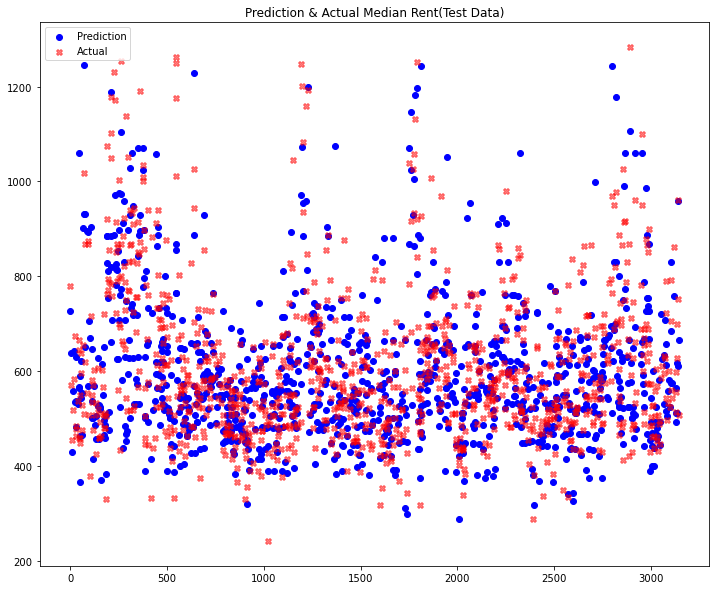

In [94]:
fig = plt.figure(figsize=(12,10))
plt.scatter(y=test_pred['Predicted'] , x=test_pred.index,color='blue',marker='o',label='Prediction')
plt.scatter(y=y_test,x=y_test.index, color='red', alpha=0.5,marker='X',label='Actual')
plt.title('Prediction & Actual Median Rent(Test Data)')
plt.legend(loc=2)
plt.show()